#KNN 분류 모델 - kaggle <Most Streamed Spotify Songs 2023> 데이터셋을 이용한 스트림수 예측
#1. 모듈

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
#성능 평가
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix


#시각화
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#2. 데이터 전처리

In [ ]:
x_data, y_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/x_data.csv'), pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_data.csv')

X,y=x_data,y_data

#Undamed: 0 행 제거, X에 target 열 추가
X= X.drop('Unnamed: 0', axis=1)
y= y.drop('Unnamed: 0', axis=1)
X['streams_n'] = y

In [ ]:
#확인
print(X)
print(y)

     bpm  key  mode  danceability_%  valence_%  energy_%  acousticness_%  \
0    125   11     1              80         89        83              31   
1     92    1     1              71         61        74               7   
2    138    5     1              51         32        53              17   
3    170    9     1              55         58        72              11   
4    144    9     0              65         23        80              14   
..   ...  ...   ...             ...        ...       ...             ...   
808  144    9     1              60         24        39              57   
809  166    6     1              42          7        24              83   
810   92    1     1              80         81        67               4   
811   97    1     1              82         67        77               8   
812   90    4     0              61         32        67              15   

     instrumentalness_%  liveness_%  speechiness_%  streams_n  
0                     0

Train, Test 데이터셋 분리
- train: 80%, test: 20%로 설정

In [ ]:
#훈련 데이터와 테스트 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.2, random_state=24)
y_train = y_train.values.ravel() #y값 차원 축소

#데이터 정규화
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
#확인
print(X_train.shape)
print(y_train.shape)

(650, 11)
(650,)


#3. 모델링
- k 결정


In [ ]:
#k 값 교차 검증
k_list = [i for i in range(1,300) if i%2 !=0] # 1~300 에서 홀수만 활용
cv_scores = []

for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors = k, p=2)  # p=2: euclidean_distance

    scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring = 'accuracy') #cross validation
    cv_scores.append(scores.mean()) # 5개 값의 평균을 담음

100%|██████████| 150/150 [00:14<00:00, 10.54it/s]


In [ ]:
#확인
cv_scores

[0.54,
 0.5,
 0.5430769230769231,
 0.5276923076923077,
 0.5246153846153846,
 0.5323076923076923,
 0.5384615384615385,
 0.5430769230769231,
 0.5599999999999999,
 0.5599999999999999,
 0.5615384615384615,
 0.5753846153846154,
 0.5492307692307692,
 0.5538461538461539,
 0.5769230769230769,
 0.5692307692307692,
 0.5769230769230769,
 0.583076923076923,
 0.5846153846153845,
 0.5738461538461538,
 0.5692307692307692,
 0.5707692307692308,
 0.5661538461538461,
 0.5599999999999999,
 0.5553846153846154,
 0.5553846153846154,
 0.5507692307692308,
 0.5676923076923077,
 0.5738461538461539,
 0.5569230769230769,
 0.5523076923076923,
 0.5599999999999999,
 0.5584615384615385,
 0.5692307692307692,
 0.583076923076923,
 0.5661538461538462,
 0.5753846153846154,
 0.5753846153846153,
 0.5615384615384615,
 0.5661538461538461,
 0.5692307692307692,
 0.5800000000000001,
 0.5784615384615385,
 0.5569230769230769,
 0.5538461538461539,
 0.5615384615384615,
 0.5615384615384615,
 0.5599999999999999,
 0.5569230769230769,
 0

최적의 k값 찾기

In [ ]:
#최적의 k값 찾기
best_k = [k_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
print("Best k: ", best_k)

Best k:  [37]


k값 시각화

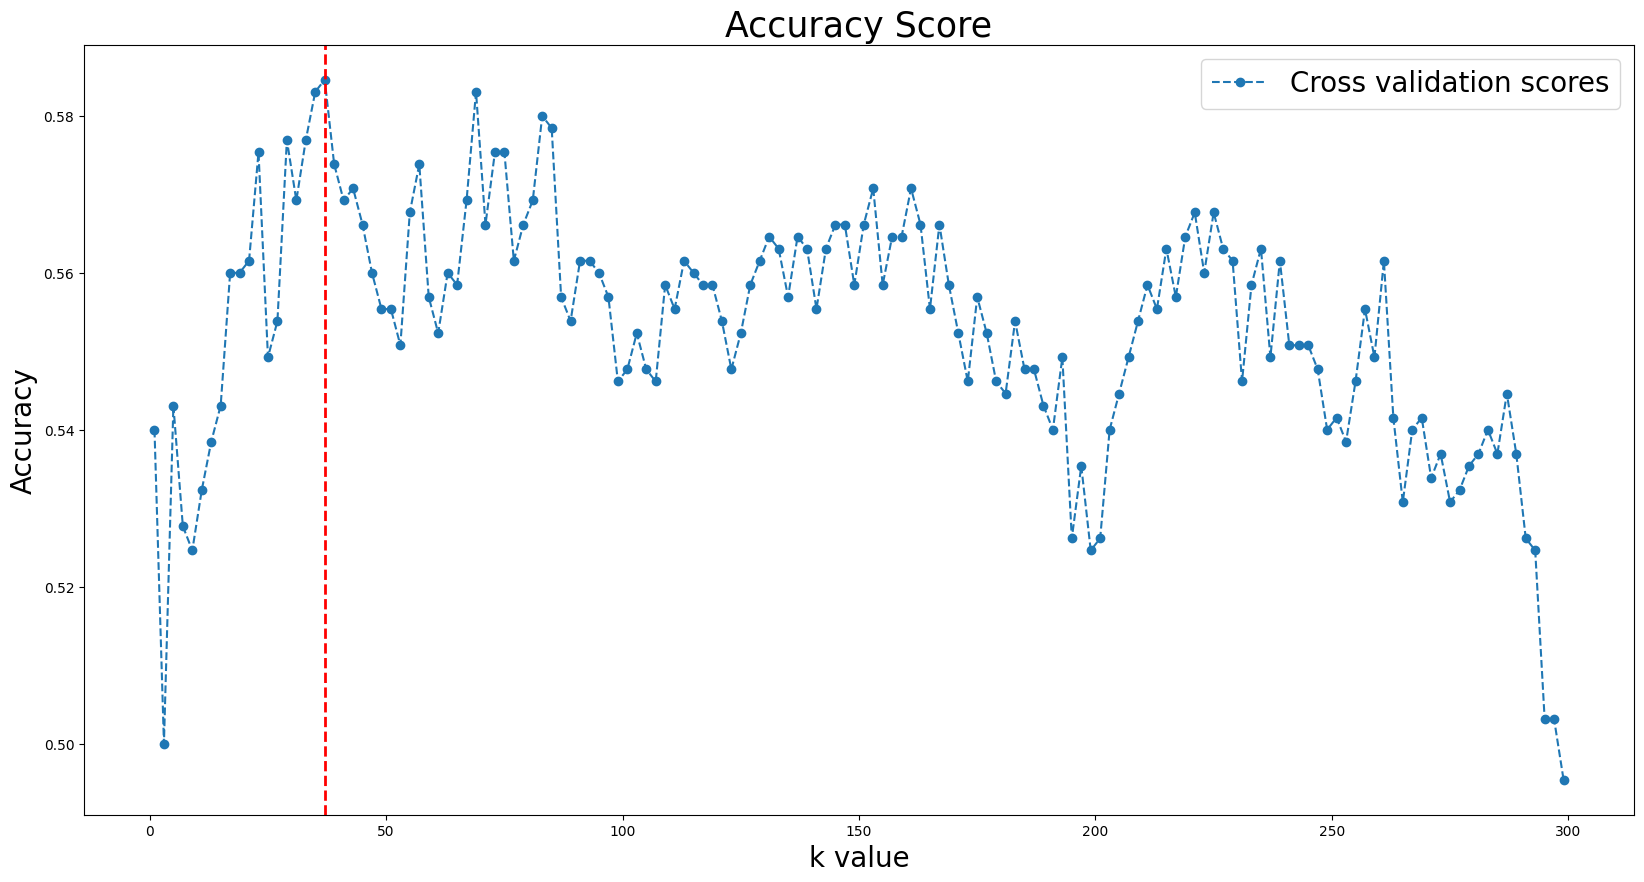

In [ ]:
#k값 시각화
plt.figure(figsize=(20,10))
plt.plot(k_list, cv_scores, marker='o', linestyle='dashed')
plt.legend(["Cross validation scores"], fontsize=20)
plt.xlabel("k value", fontsize=20 )
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.show()

###4. 성능 확인

In [ ]:
model = KNeighborsClassifier(n_neighbors = 37, p=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_true = y_test, y_pred =y_pred) ## 정확도
recall = recall_score(y_true = y_test, y_pred =y_pred,average='macro') ## 민감도
precision = precision_score(y_true = y_test, y_pred =y_pred,average='macro') ## 정밀도


print(f"정확도:{acc:0.2f}",f"민감도:{recall:0.2f}",f"정밀도:{precision:0.2f}", sep='  |  ')

정확도:0.58  |  민감도:0.58  |  정밀도:0.59
